## Exploratory analysis of the dependend variables

In [323]:
import pandas as pd 
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist

In [324]:
data_frame_combinado = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep = ',')

data_frame_combinado.head()

,id,Degree_Rede_EntreajudaLabur,OutDeg_Var.Dep_RedeControlExtAusencia,OutDeg_Var.Dep_ApoioSpecDiqCint,OutDeg_Var.Dep_ApoioSpecTubos,OutDeg_Var.Dep_RedApoiLevntDiCin,OutDeg_RedCont_DiqPriqDiqCint,OutDeg_RedeRepar_DiqPriqDiqCint,OutDeg_Red-Val_Cont1Rep2DiqCin,OutDeg_Red-Val_Cont1Rep2DiqPrq,OutDeg_ContRep2_DiqPrqCin,OutDeg_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7,0,1,0,2,2,2,0,4,4,1
1,Alamada Bia,2,2,1,0,0,1,1,0,2,2,0
2,Alanghate Mfumba,10,1,1,0,0,0,0,0,0,0,0
3,Albat Calabus,10,2,1,0,0,1,1,0,2,2,0
4,Americano Mbunde,19,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Group by 'id' and calculate average (if necessary)
data_frame_combinado_dep_grouped = data_frame_combinado.groupby('id').mean().reset_index()

# Remove the 'id' column to perform the PCA
data_for_pca = data_frame_combinado_dep_grouped.drop(columns=['id']).dropna()

data_frame_combinado_dep_grouped.dropna()

,id,Degree_Rede_EntreajudaLabur,OutDeg_Var.Dep_RedeControlExtAusencia,OutDeg_Var.Dep_ApoioSpecDiqCint,OutDeg_Var.Dep_ApoioSpecTubos,OutDeg_Var.Dep_RedApoiLevntDiCin,OutDeg_RedCont_DiqPriqDiqCint,OutDeg_RedeRepar_DiqPriqDiqCint,OutDeg_Red-Val_Cont1Rep2DiqCin,OutDeg_Red-Val_Cont1Rep2DiqPrq,OutDeg_ContRep2_DiqPrqCin,OutDeg_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,4.0,4.0,1.0
1,Alamada Bia,2.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0
2,Alanghate Mfumba,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Albat Calabus,10.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0
4,Americano Mbunde,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Vieira Bedugle,9.0,3.0,4.0,0.0,1.0,7.0,3.0,7.0,8.0,10.0,0.0
125,Viriato Quintunda,12.0,1.0,2.0,0.0,0.0,3.0,2.0,4.0,4.0,5.0,0.0
126,Wangna Ntchoba,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,Wilndan Tchuda,9.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,4.0,5.0,2.0


In [ ]:
## List of variables

# list Indeg = ['Degree_Rede_EntreajudaLabur' ,'Indeg_Var.Dep_RedeControlExtAusencia'	,'Indeg_Var.Dep_ApoioSpecDiqCint',	'Indeg_Var.Dep_ApoioSpecTubos'	,'Indeg_Var.Dep_RedApoiLevntDiCin',	'Indeg_RedCont_DiqPriqDiqCint'	,'Indeg_RedeRepar_DiqPriqDiqCint',	'Indeg_Red-Val_Cont1Rep2DiqCin'	,'Indeg_Red-Val_Cont1Rep2DiqPrq'	,'Indeg_ContRep2_DiqPrqCin'	,'Indeg_Var.Dep_RedePartilhaAgu']
# list OutDeg = ['Degree_Rede_EntreajudaLabur', 'OutDeg_Var.Dep_RedeControlExtAusencia',    'OutDeg_Var.Dep_ApoioSpecDiqCint',  'OutDeg_Var.Dep_ApoioSpecTubos',    'OutDeg_Var.Dep_RedApoiLevntDiCin', 'OutDeg_RedCont_DiqPriqDiqCint',    'OutDeg_RedeRepar_DiqPriqDiqCint'   ,'OutDeg_Red-Val_Cont1Rep2DiqCin',  'OutDeg_Red-Val_Cont1Rep2DiqPrq',   'OutDeg_ContRep2_DiqPrqCin',    'OutDeg_Var.Dep_RedePartilhaAgu']

data_for_pca = data_frame_combinado[['OutDeg_Var.Dep_RedeControlExtAusencia',    'OutDeg_Var.Dep_ApoioSpecDiqCint',  'OutDeg_Var.Dep_ApoioSpecTubos',    'OutDeg_Var.Dep_RedApoiLevntDiCin',  'OutDeg_ContRep2_DiqPrqCin']] # Estas son las variables
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

        PC1       PC2                id
0 -0.128817 -0.097746       Aiace Quior
1 -0.511157 -0.081436       Alamada Bia
2 -0.917965  0.277556  Alanghate Mfumba
3 -0.511157 -0.081436     Albat Calabus
4 -1.310779  0.574683  Americano Mbunde


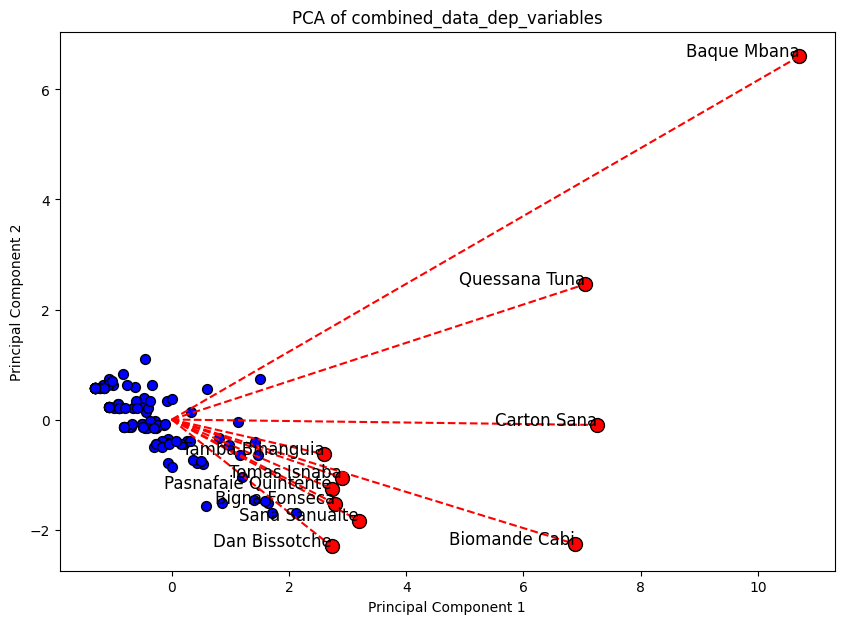

In [ ]:

# Perform PCA
pca = PCA(n_components=2)  # Change n_components based on your needs
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_dep_grouped['id']

# Display the first rows of the principal components DataFrame
print(principal_df.head())

# Select the most relevant IDs (e.g., the 5 highest absolute values of PC1). NOTE: Change this value if you want to explore more.
top_n = 10
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Plot the principal components
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Add lines and labels for the most relevant IDs
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_dep_variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)
plt.show()


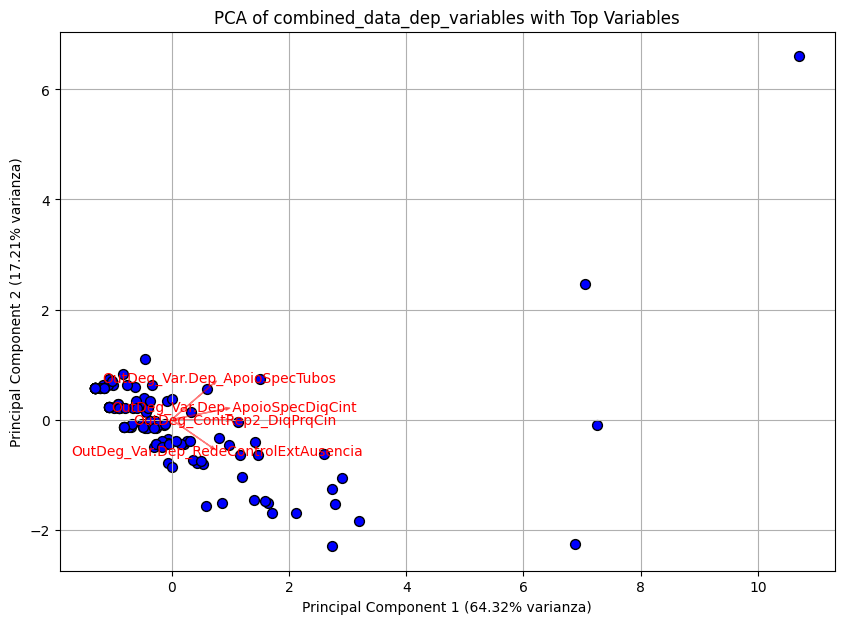

In [ ]:
# Calculate the contribution of each variable to the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame with the loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Select the most relevant variables (e.g., the 5 with the highest contribution to PC1 and PC2). 
# NOTE: Change this value if you want to explore more.
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Plot the principal components
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

explained_var_ratio = pca.explained_variance_ratio_

# Add lines and labels for the most relevant variables
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% variance)')
plt.grid(True)
plt.show()


In [445]:
data_for_pca.head()

,OutDeg_Var.Dep_RedeControlExtAusencia,OutDeg_Var.Dep_ApoioSpecDiqCint,OutDeg_Var.Dep_ApoioSpecTubos,OutDeg_Var.Dep_RedApoiLevntDiCin,OutDeg_ContRep2_DiqPrqCin
0,0,1,0,2,4
1,2,1,0,0,2
2,1,1,0,0,0
3,2,1,0,0,2
4,0,0,0,0,0


In [446]:
print(top_vars)

{'OutDeg_Var.Dep_ApoioSpecDiqCint', 'OutDeg_Var.Dep_RedeControlExtAusencia', 'OutDeg_ContRep2_DiqPrqCin', 'OutDeg_Var.Dep_ApoioSpecTubos'}


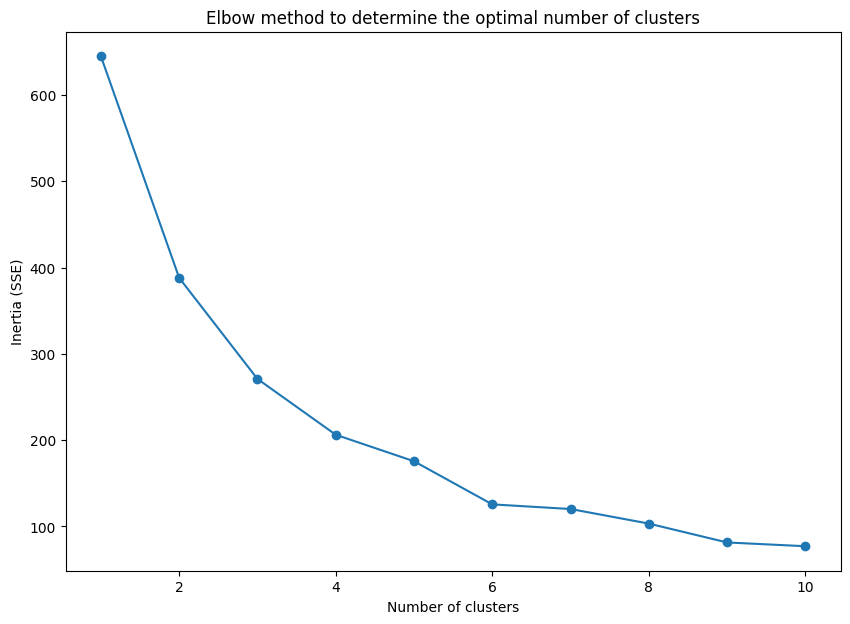

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# detelete column 'id'
data_for_clustering = data_for_pca

# Scale the data 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Determining the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the result
plt.figure(figsize=(10, 7))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method to determine the optimal number of clusters')
plt.show()


Archivo guardado exitosamente en ../Results/pca_kmeans_results_dep_variables.xlsx.


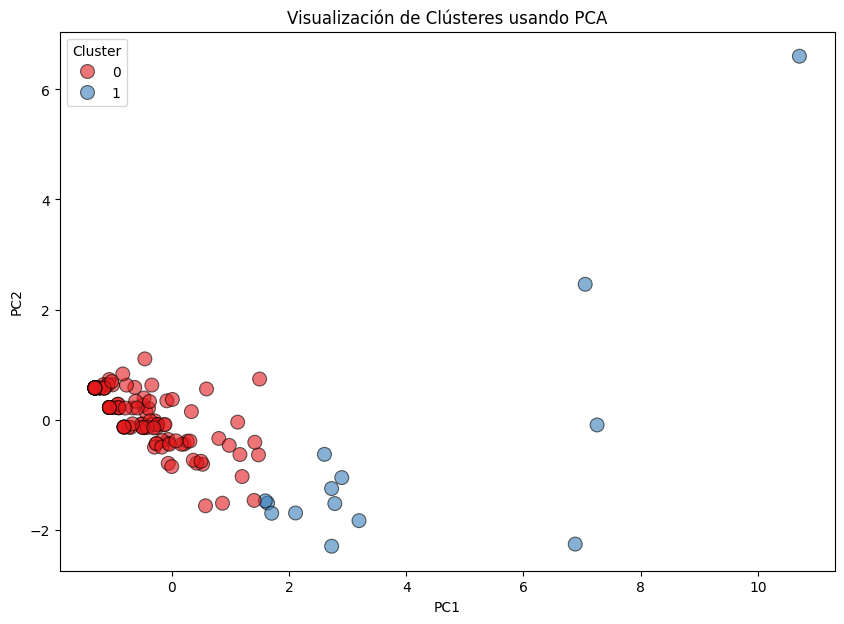

In [ ]:
# Apply K-Means with the optimal number of clusters (choose k based on the elbow plot)
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_frame_combinado_dep_grouped['Cluster'] = kmeans.fit_predict(data_scaled)

# Count the number of elements in each cluster
cluster_counts = data_frame_combinado_dep_grouped['Cluster'].value_counts()

# Define a threshold for small clusters (e.g., fewer than 10 elements)
threshold = 2
small_clusters = cluster_counts[cluster_counts < threshold].index

# Merge small clusters into an "Other" cluster
data_frame_combinado_dep_grouped['Cluster'] = data_frame_combinado_dep_grouped['Cluster'].apply(lambda x: 'Other' if x in small_clusters else x)

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = data_frame_combinado_dep_grouped['Cluster']

# Export results to an Excel file
output_path = "../Results/pca_kmeans_results_dep_variables.xlsx"
os.makedirs("../Results/", exist_ok=True)
try:
    with pd.ExcelWriter(output_path) as writer:
        data_frame_combinado_dep_grouped.to_excel(writer, sheet_name='Cluster_Asignations', index=False)
        principal_df.to_excel(writer, sheet_name='PCA_Results', index=False)
    print(f"File successfully saved at {output_path}.")
except Exception as e:
    print(f"Error saving the file: {e}")

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=principal_df, s=100, alpha=0.6, edgecolor='k')
plt.title('Cluster Visualization using PCA')
plt.show()


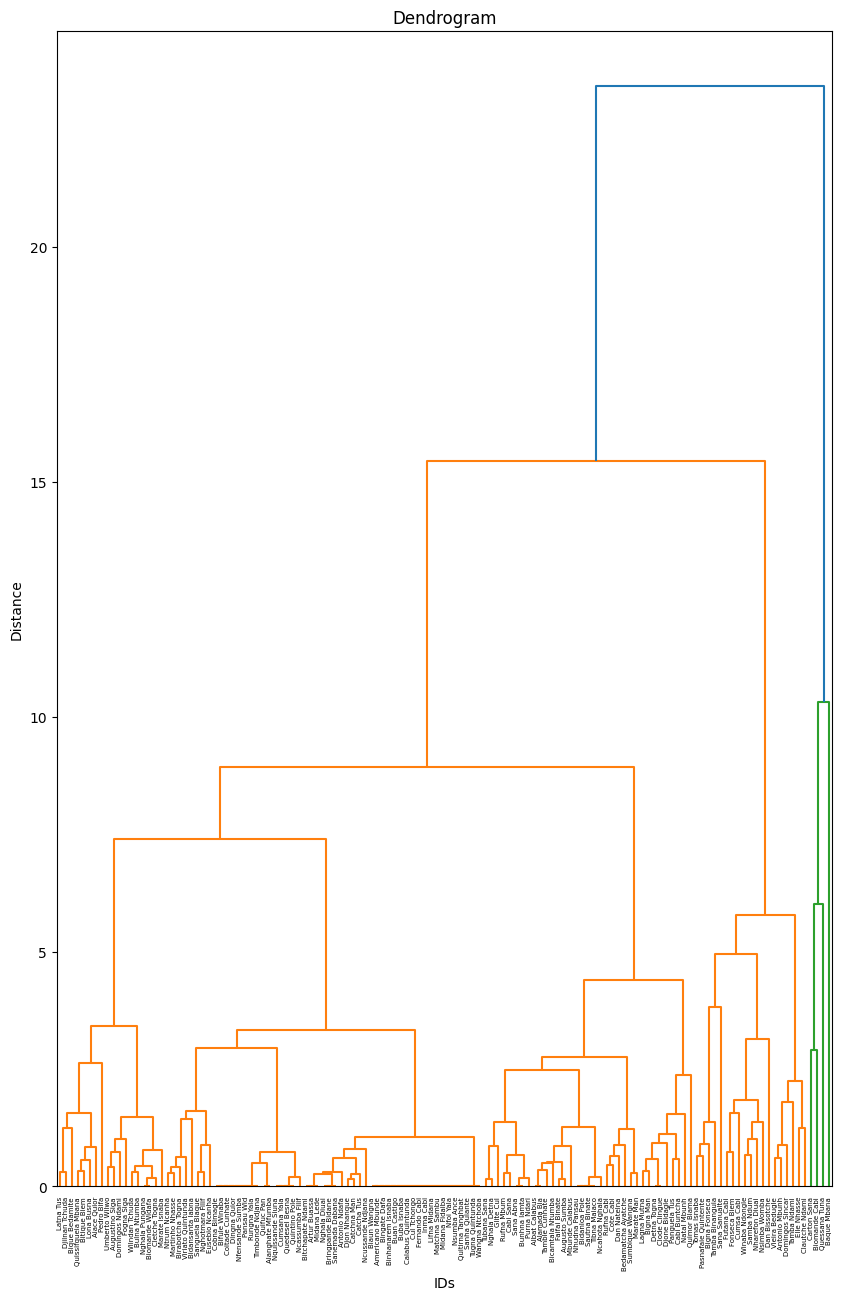

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Calculate the link for the dendrogram using the 'ward' method
linked = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 15))
dendrogram(linked, orientation='top', labels=data_frame_combinado_dep_grouped['id'].values, distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('IDs')
plt.ylabel('Distance')
plt.show()

## Exploratory analysis of independen data

In [450]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist

In [451]:
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep = ',')

data_frame_combinado_indep

,id,OutDeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,OutDeg_PaiTiopaterC,OutDeg_TiosMaternos,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,Aiace Quior,0,0,3,0,0,8,2,3,2,...,Ntchugal,0,0,53,2,1.0,3,3,0,2.3644
1,Alamada Bia,0,0,0,0,0,4,4,0,1,...,Fanhi,0,0,37,2,1.0,1,0,0,0.5087
2,Alanghate Mfumba,0,0,0,0,0,3,2,0,3,...,Bsoran,0,0,25,1,1.0,4,3,1,1.4640
3,Albat Calabus,0,0,0,0,2,6,4,1,2,...,Bsoran,1,0,48,2,2.0,4,3,0,1.5186
4,Americano Mbunde,0,0,2,0,3,1,1,0,2,...,Fanhi,0,0,30,1,1.0,2,1,0,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Vieira Bedugle,3,3,0,0,0,9,4,8,1,...,Ntchugal,1,0,52,2,2.0,4,16,1,4.7238
125,Viriato Quintunda,0,0,4,0,0,12,5,2,2,...,Ntchugal,1,0,51,2,3.0,2,7,0,5.3823
126,Wangna Ntchoba,0,0,0,0,1,3,2,2,1,...,Ntchugal,1,0,78,3,2.0,1,1,0,2.9833
127,Wilndan Tchuda,0,0,0,0,0,4,4,0,1,...,Ntchugal,1,0,52,2,1.0,4,3,0,1.3262


In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# List of columns to transform
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    data_frame_combinado_indep[col] = label_encoder.fit_transform(data_frame_combinado_indep[col])

# Now the columns '1_VarExp_Moranca' and '2_VarExp_Atri_Tabanca' are transformed into numeric values
print(data_frame_combinado_indep.head())


                 id  OutDeg_RedConfltAgu  Degree_RedConfliAgu  \
0       Aiace Quior                    0                    0   
1       Alamada Bia                    0                    0   
2  Alanghate Mfumba                    0                    0   
3     Albat Calabus                    0                    0   
4  Americano Mbunde                    0                    0   

   Degree_RedeIrmonsPr  OutDeg_PaiTiopaterC  OutDeg_TiosMaternos  \
0                    3                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    2   
4                    2                    0                    3   

   Degree_IntimAmigUnd  OutDeg_IntimAmigos_  OutDeg_RedeRisk_Cen  \
0                    8                    2                    3   
1                    4                    4                    0

In [ ]:
# Group by 'id' and calculate average 
data_frame_combinado_indep_grouped = data_frame_combinado_indep.groupby('id').mean().reset_index()

# Remove the 'id' column to perform the PCA

data_for_pca = data_frame_combinado_indep_grouped.drop(columns=['id'])
data_for_pca = data_for_pca[['OutDeg_RedConfltAgu','Degree_RedConfliAgu','Degree_RedeIrmonsPr',
 'OutDeg_PaiTiopaterC','OutDeg_TiosMaternos','Degree_IntimAmigUnd',
'OutDeg_IntimAmigos_','OutDeg_RedeRisk_Cen','OutDeg_RedeConfianc',
'Degree_RedeConflitA','Degree_RedeConflitG','OutDeg_VendaParcela',
'OutDeg_EmprestParce','PC1_Distance_Pro','PC2_Distance_Pro',
'Avg_Distancia_Dist_moranza','Degree_RedeTotFamil','1_VarExp_Moranca',
'2_VarExp_Atri_Tabanca','3_VarExp_Atri_Fanado','4_VarExp_Atri_CargosWM',
'5_VarExp_Atri_Idade','6_VarExp_Atri_ClassIdade','7_VarExp_Atri_IndForcaFugon',
'8_VarExp_Atri_IndInvestDiq','9_VarExp_Atri_IndMelhorTecnDiqCint','10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']]

# data_for_pca = data_for_pca[['OutDeg_RedConfltAgu','Degree_RedConfliAgu','Degree_RedeIrmonsPr',
#  'OutDeg_PaiTiopaterC','OutDeg_TiosMaternos','Degree_IntimAmigUnd',
# 'OutDeg_IntimAmigos_','OutDeg_RedeRisk_Cen','OutDeg_RedeConfianc',
# 'Degree_RedeConflitA','Degree_RedeConflitG','OutDeg_VendaParcela',
# 'OutDeg_EmprestParce','PC1_Distance_Pro','PC2_Distance_Pro',
# 'Avg_Distancia_Dist_moranza','Degree_RedeTotFamil','1_VarExp_Moranca',
# '2_VarExp_Atri_Tabanca','3_VarExp_Atri_Fanado','4_VarExp_Atri_CargosWM',
# '5_VarExp_Atri_Idade','6_VarExp_Atri_ClassIdade','7_VarExp_Atri_IndForcaFugon',
# '8_VarExp_Atri_IndInvestDiq','9_VarExp_Atri_IndMelhorTecnDiqCint','10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']]


# data_for_pca = data_for_pca[['Indeg_RedConfltAgu','Degree_RedConfliAgu','Degree_RedeIrmonsPr',
#  'Indeg_PaiTiopaterC','Indeg_TiosMaternos','Degree_IntimAmigUnd',
# 'Indeg_IntimAmigos_','Indeg_RedeRisk_Cen','Indeg_RedeConfianc',
# 'Degree_RedeConflitA','Degree_RedeConflitG','Indeg_VendaParcela',
# 'Indeg_EmprestParce','PC1_Distance_Pro','PC2_Distance_Pro','Data_area',
# 'Avg_Distancia_Dist_moranza','Degree_RedeTotFamil','1_VarExp_Moranca',
# '2_VarExp_Atri_Tabanca','3_VarExp_Atri_Fanado','4_VarExp_Atri_CargosWM',
# '5_VarExp_Atri_Idade','6_VarExp_Atri_ClassIdade','7_VarExp_Atri_IndForcaFugon',
# '8_VarExp_Atri_IndInvestDiq','9_VarExp_Atri_IndMelhorTecnDiqCint','10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']]


data_for_pca

,OutDeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,OutDeg_PaiTiopaterC,OutDeg_TiosMaternos,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,Degree_RedeConflitA,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,0.0,0.0,3.0,0.0,0.0,8.0,2.0,3.0,2.0,0.0,...,2.0,0.0,0.0,53.0,2.0,1.0,3.0,3.0,0.0,2.3644
1,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,...,1.0,0.0,0.0,37.0,2.0,1.0,1.0,0.0,0.0,0.5087
2,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,3.0,0.0,...,0.0,0.0,0.0,25.0,1.0,1.0,4.0,3.0,1.0,1.4640
3,0.0,0.0,0.0,0.0,2.0,6.0,4.0,1.0,2.0,0.0,...,0.0,1.0,0.0,48.0,2.0,2.0,4.0,3.0,0.0,1.5186
4,0.0,0.0,2.0,0.0,3.0,1.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,30.0,1.0,1.0,2.0,1.0,0.0,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3.0,3.0,0.0,0.0,0.0,9.0,4.0,8.0,1.0,0.0,...,2.0,1.0,0.0,52.0,2.0,2.0,4.0,16.0,1.0,4.7238
125,0.0,0.0,4.0,0.0,0.0,12.0,5.0,2.0,2.0,0.0,...,2.0,1.0,0.0,51.0,2.0,3.0,2.0,7.0,0.0,5.3823
126,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,1.0,0.0,...,2.0,1.0,0.0,78.0,3.0,2.0,1.0,1.0,0.0,2.9833
127,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,...,2.0,1.0,0.0,52.0,2.0,1.0,4.0,3.0,0.0,1.3262


        PC1       PC2                id
0 -0.443670  0.111546       Aiace Quior
1 -2.552965 -1.045535       Alamada Bia
2 -2.137825 -1.996643  Alanghate Mfumba
3 -0.986092  0.815409     Albat Calabus
4 -1.354149 -3.029918  Americano Mbunde


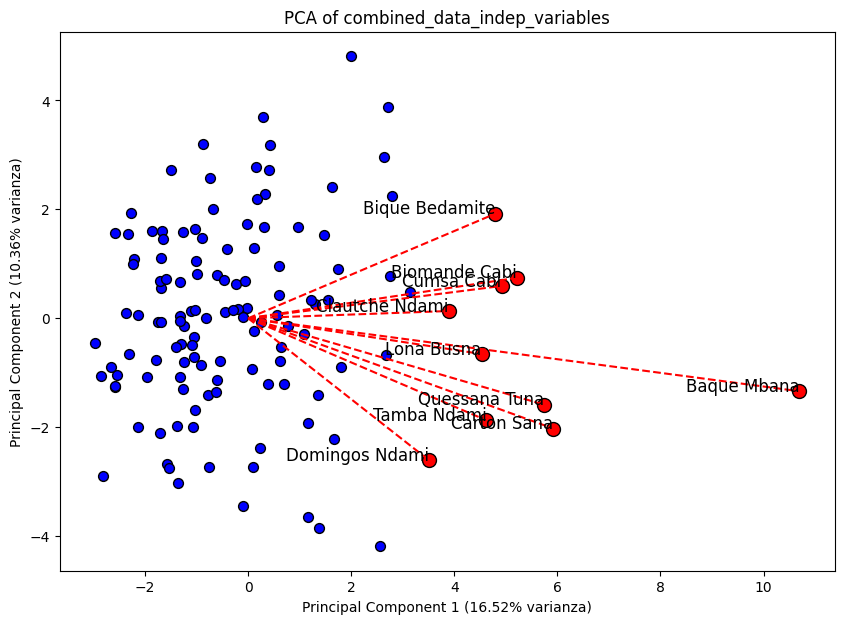

In [ ]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Perform PCA
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Display the first rows of the principal components DataFrame
print(principal_df.head())

# Select the most relevant IDs (e.g., the 5 highest absolute values of PC1). NOTE: Change this value if you want to explore more.
top_n = 10
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Plot the principal components
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)
explained_var_ratio = pca.explained_variance_ratio_

# Add lines and labels for the most relevant IDs
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_indep_variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% variance)')

plt.grid(False)
plt.show()


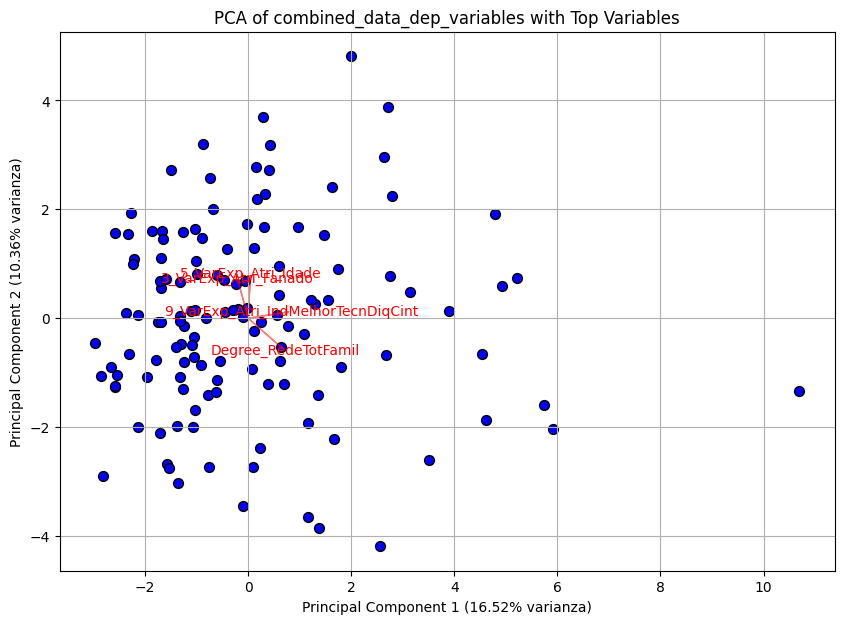

In [ ]:
# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Calculate the contribution of each variable to the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame with the loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Select the most relevant variables (e.g., the 5 with the highest contribution to PC1 and PC2)
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Plot the principal components
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Add lines and labels for the most relevant variables
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% variance)')
plt.grid(True)
plt.show()


In [456]:
print(top_vars)

{'3_VarExp_Atri_Fanado', '5_VarExp_Atri_Idade', 'Degree_RedeTotFamil', '9_VarExp_Atri_IndMelhorTecnDiqCint'}


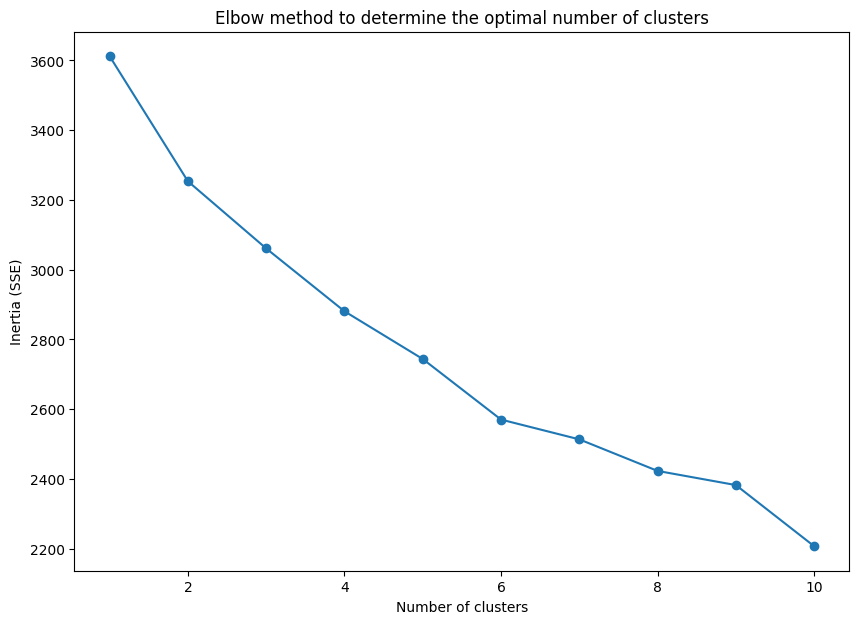

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'id' column
data_for_clustering = data_frame_combinado_indep_grouped.drop(columns=['id'])

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 7))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method to determine the optimal number of clusters')
plt.show()



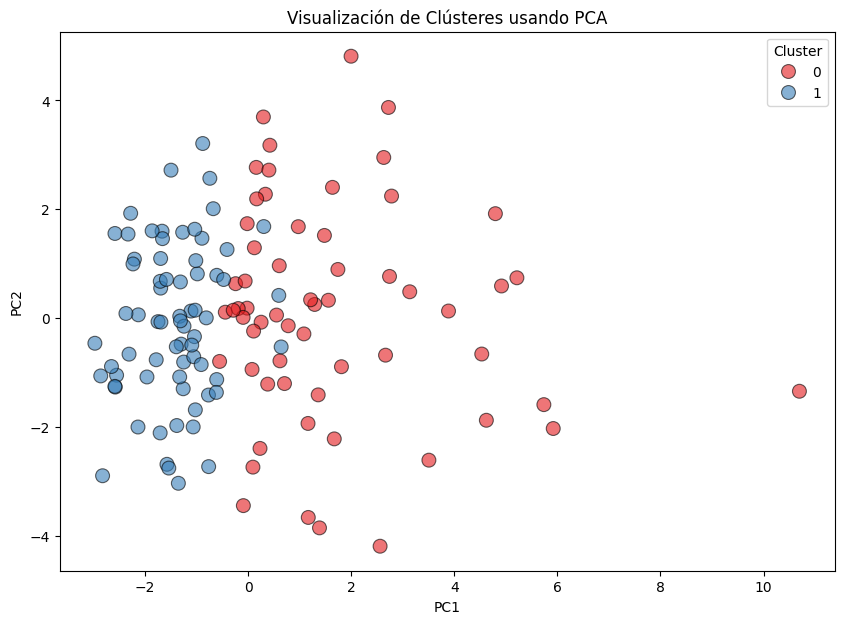

Archivo guardado exitosamente en ../Results/pca_kmeans_results_indep_variables.xlsx.


In [ ]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Apply K-Means with the optimal number of clusters
optimal_k = 2  # Replace this value with the optimal number you determine from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_frame_combinado_indep_grouped['Cluster'] = kmeans.fit_predict(data_scaled)

# Count the number of elements in each cluster
cluster_counts = data_frame_combinado_indep_grouped['Cluster'].value_counts()

# Define a threshold for small clusters (e.g., fewer than 2 elements)
threshold = 2
small_clusters = cluster_counts[cluster_counts < threshold].index

# Merge small clusters into an "Other" cluster
data_frame_combinado_indep_grouped['Cluster'] = data_frame_combinado_indep_grouped['Cluster'].apply(lambda x: 'Other' if x in small_clusters else x)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = data_frame_combinado_indep_grouped['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=principal_df, s=100, alpha=0.6, edgecolor='k')
plt.title('Cluster Visualization using PCA')
plt.show()

# Export results to an Excel file
output_path = "../Results/pca_kmeans_results_indep_variables.xlsx"
os.makedirs("../Results/", exist_ok=True)
try:
    with pd.ExcelWriter(output_path) as writer:
        data_frame_combinado_indep_grouped.to_excel(writer, sheet_name='Cluster_Asignations', index=False)
        principal_df.to_excel(writer, sheet_name='PCA_Results', index=False)
    print(f"File successfully saved at {output_path}.")
except Exception as e:
    print(f"Error saving the file: {e}")


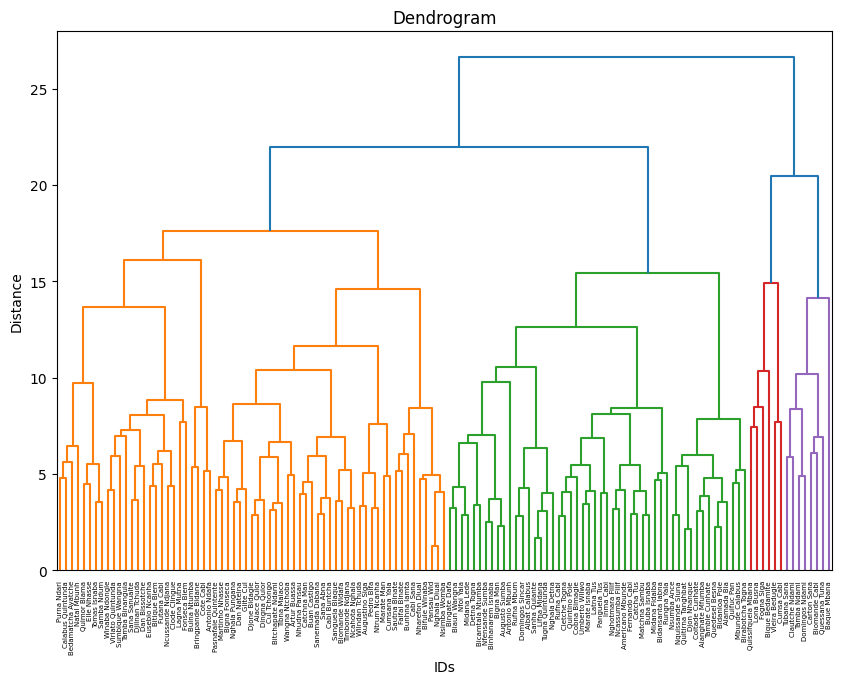

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data_frame_combinado_indep_grouped['id'].values, distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('IDs')
plt.ylabel('Distance')
plt.show()

## Plots de las variables dependientes

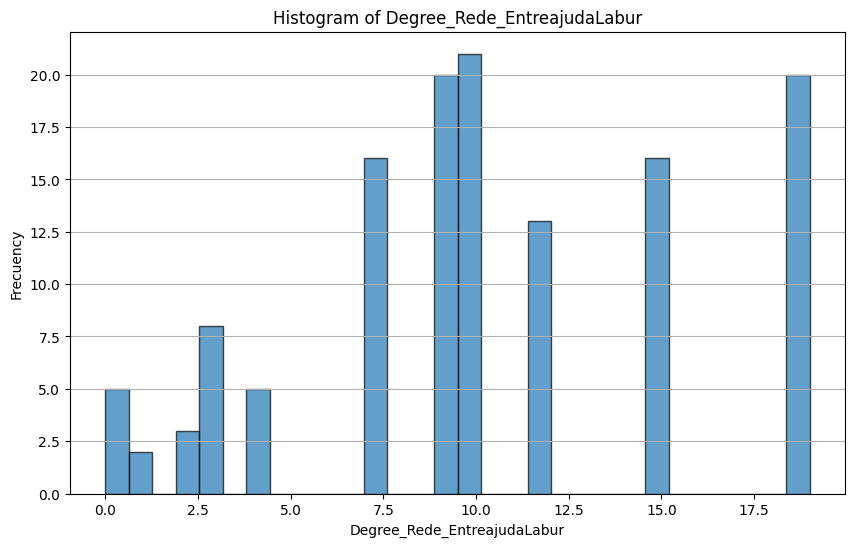

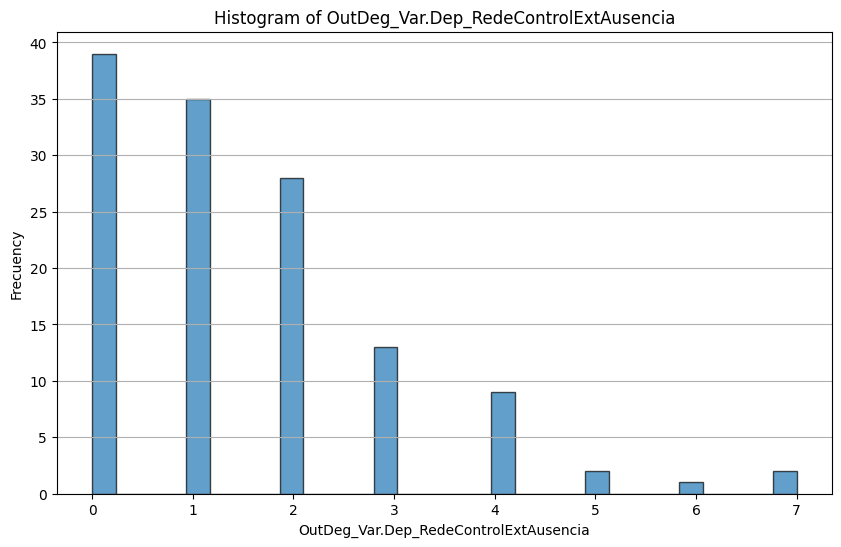

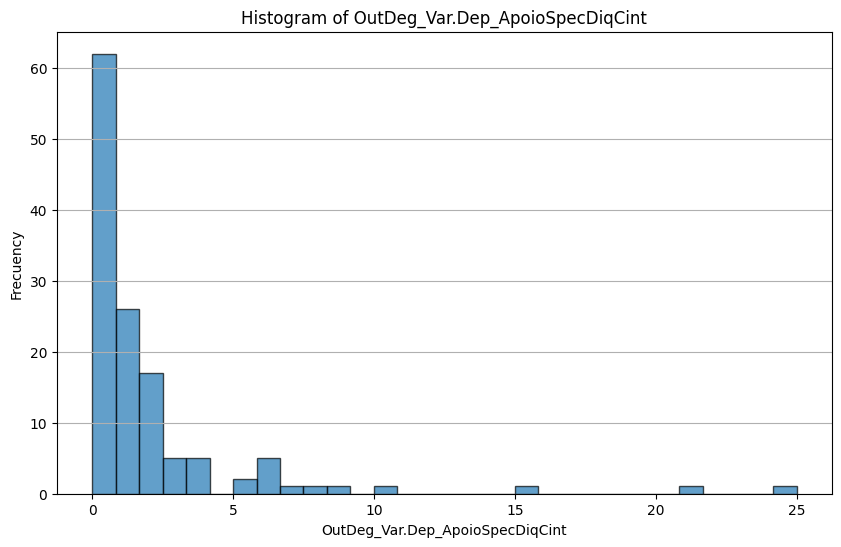

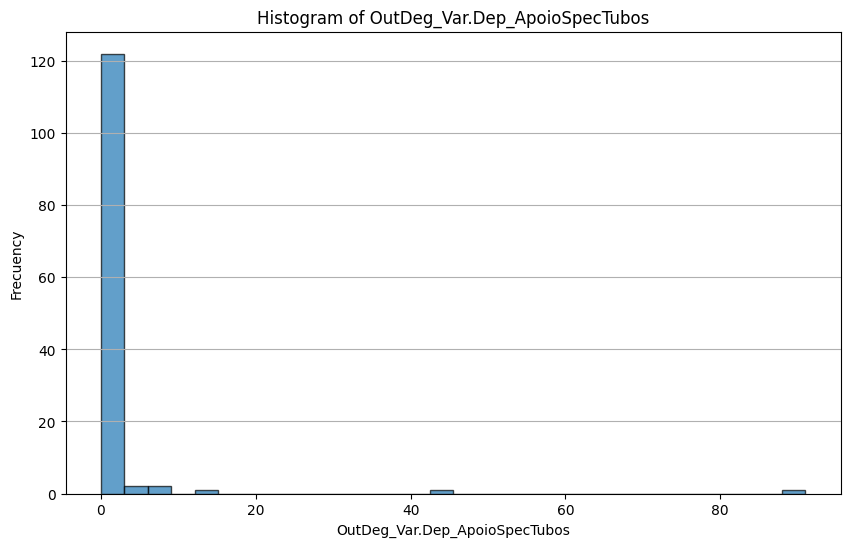

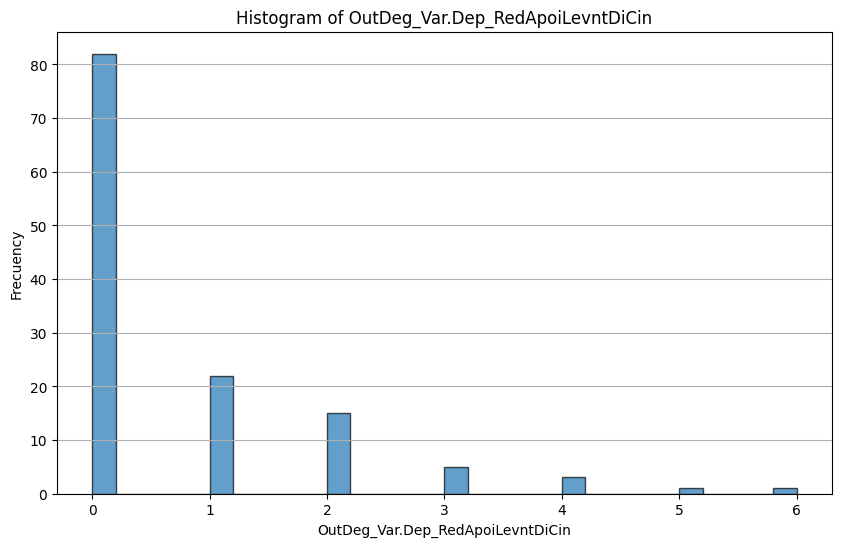

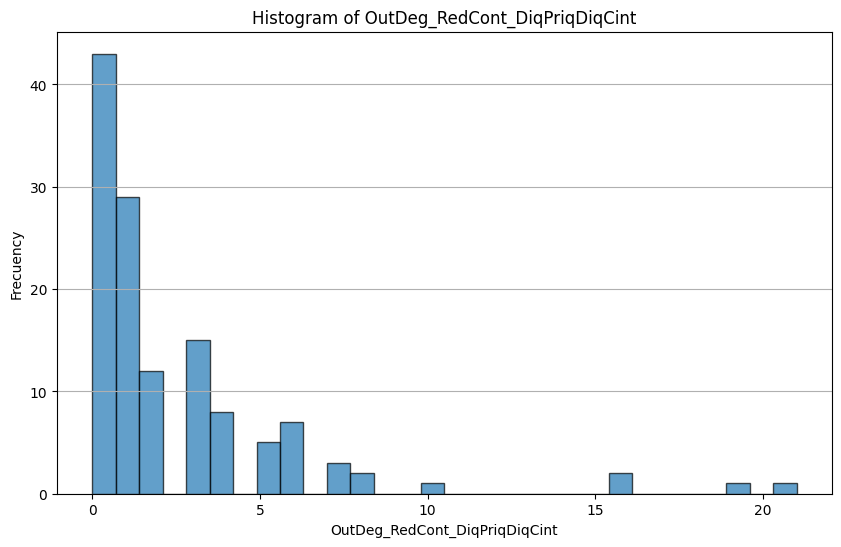

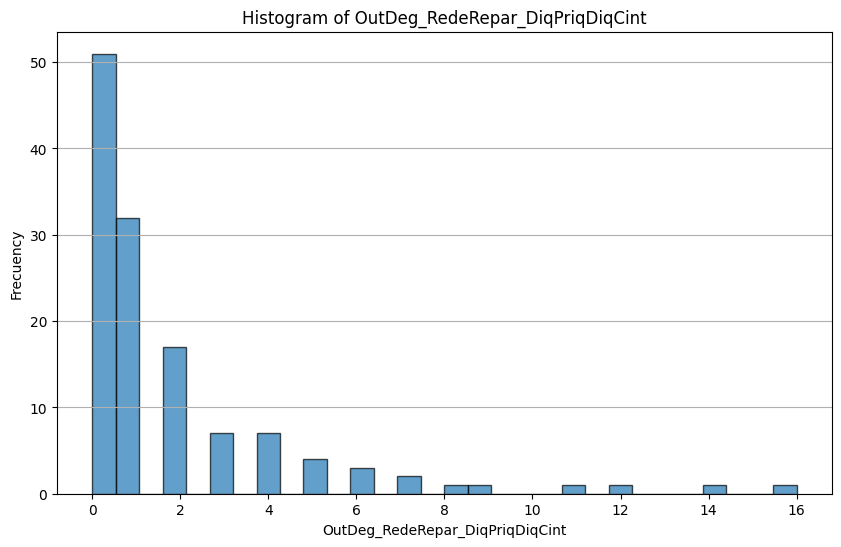

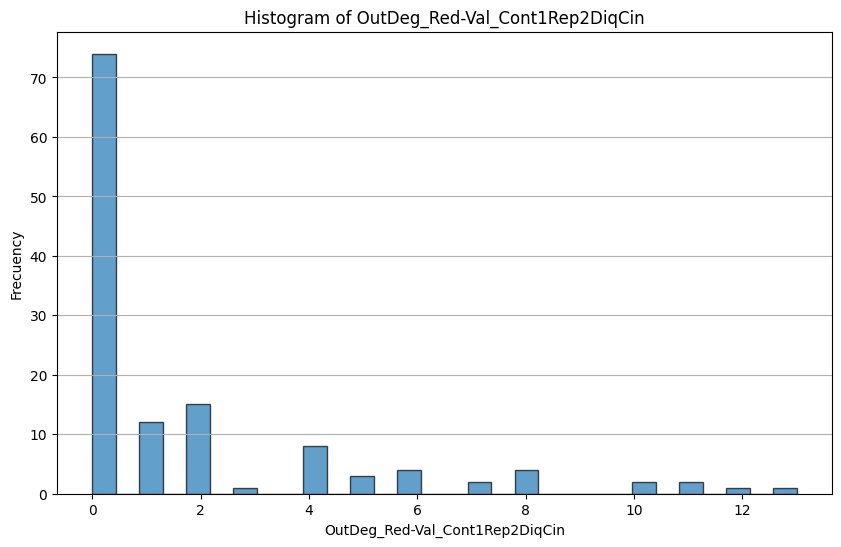

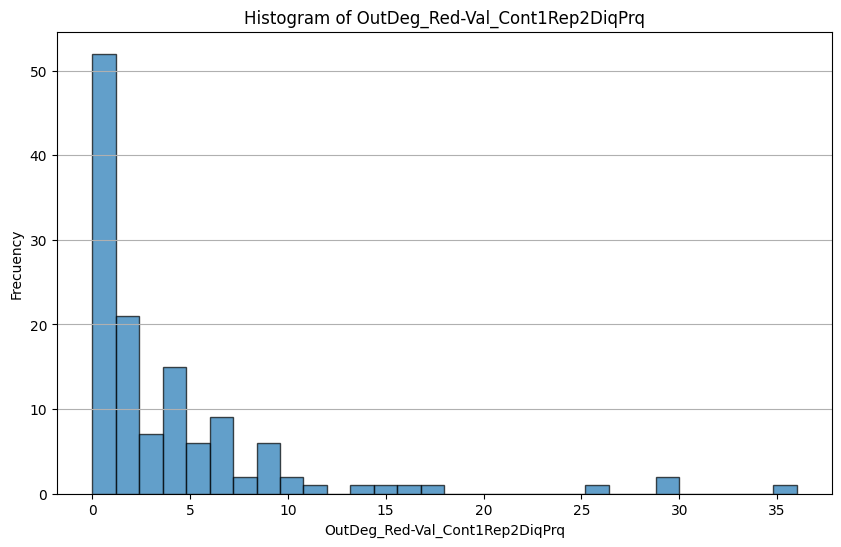

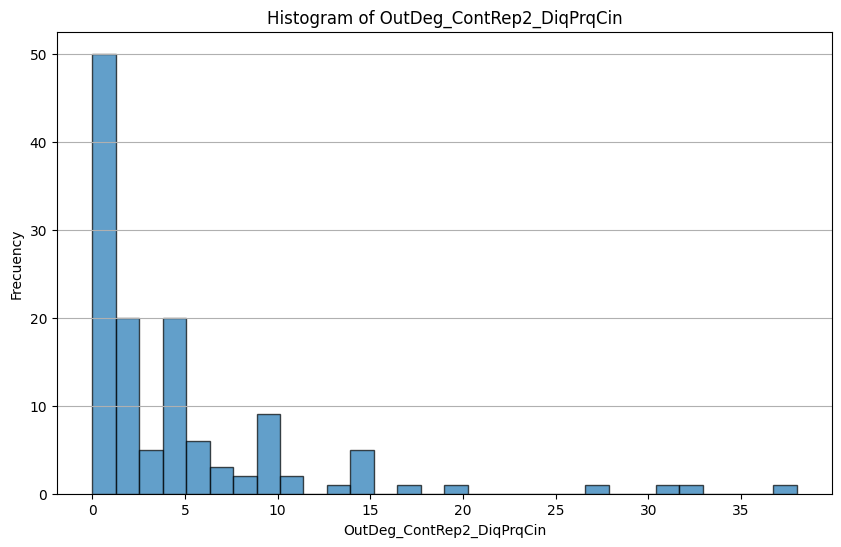

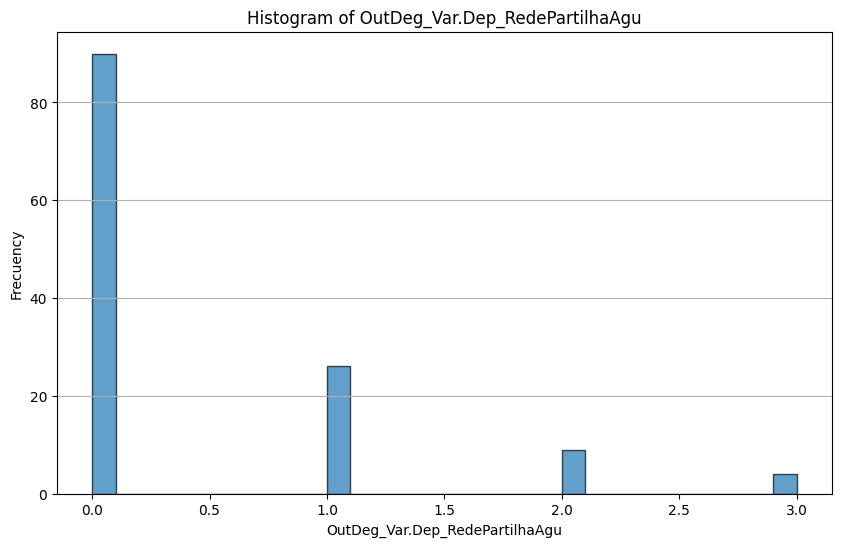

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Exclude the 'id' column
dep_vars_df = data_frame_combinado.drop(columns=['id'])

# Select the number of variables you want to plot
num_plots = 12  # Choose how many plots you want here. Be careful if you select too many, it will plot all of them.

# Create histograms for each selected dependent variable and save them
selected_columns = dep_vars_df.columns[:num_plots]

for col in selected_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dep_vars_df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    #plt.savefig(f'../DataIntermediate/histogram_{col}.png') # If you want to save the plot, remove the first # from this line.
    plt.show()



## Plots de las variables independientes

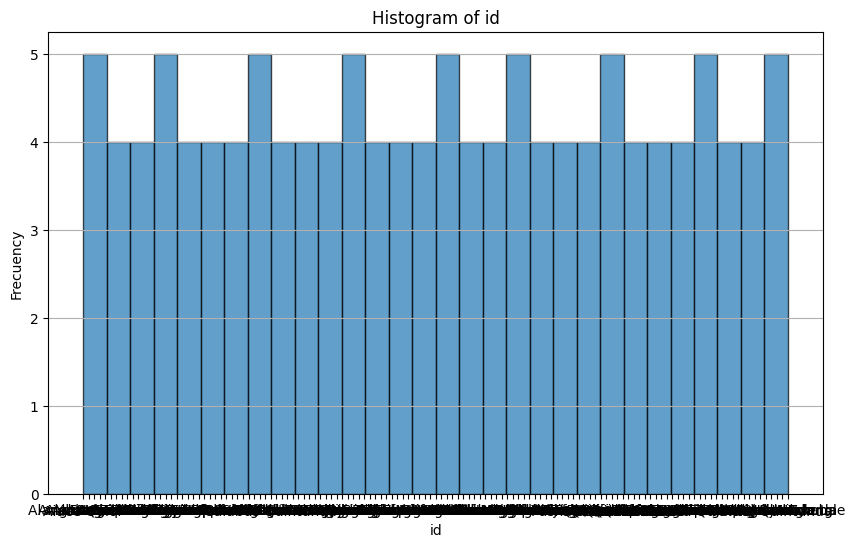

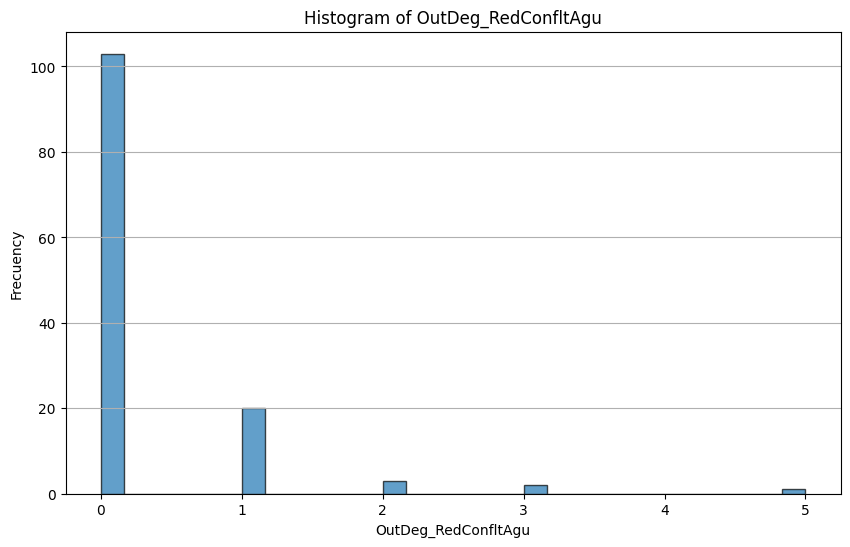

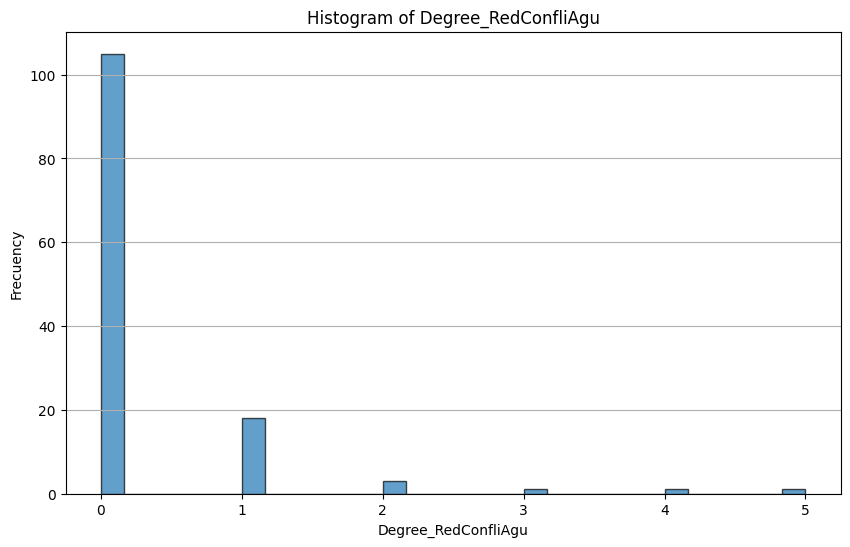

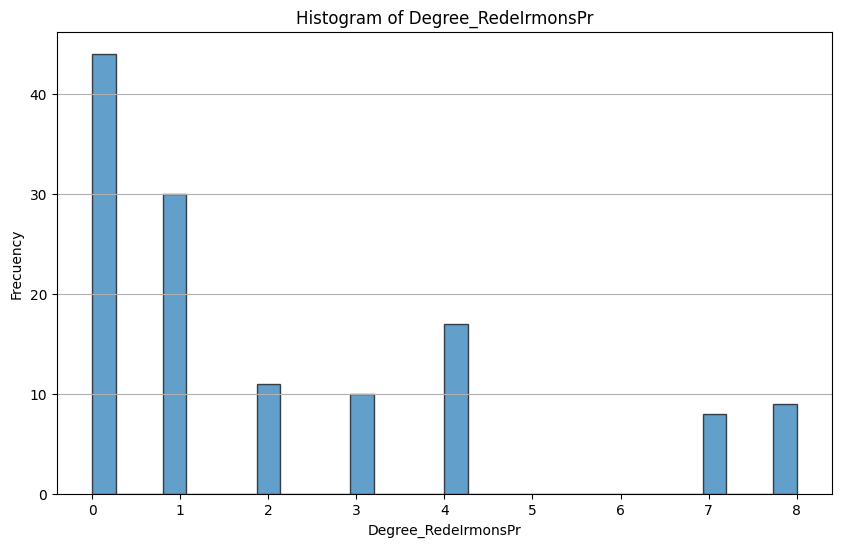

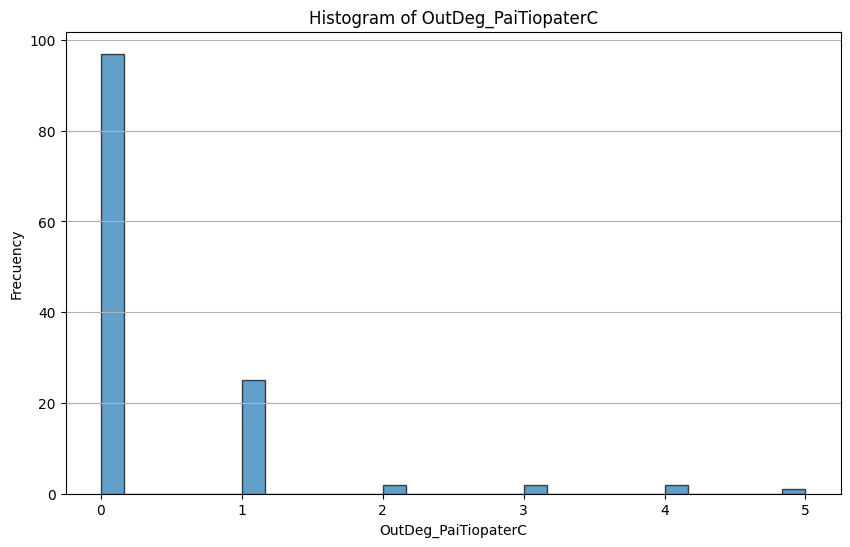

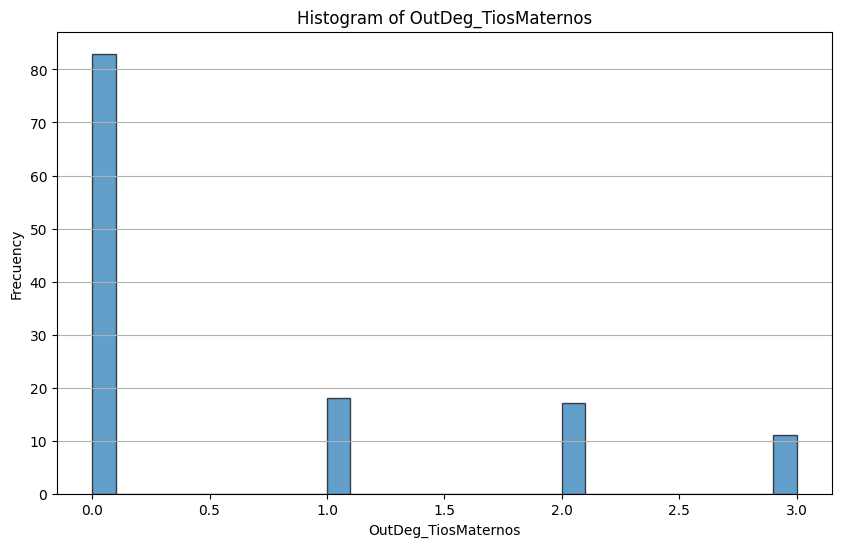

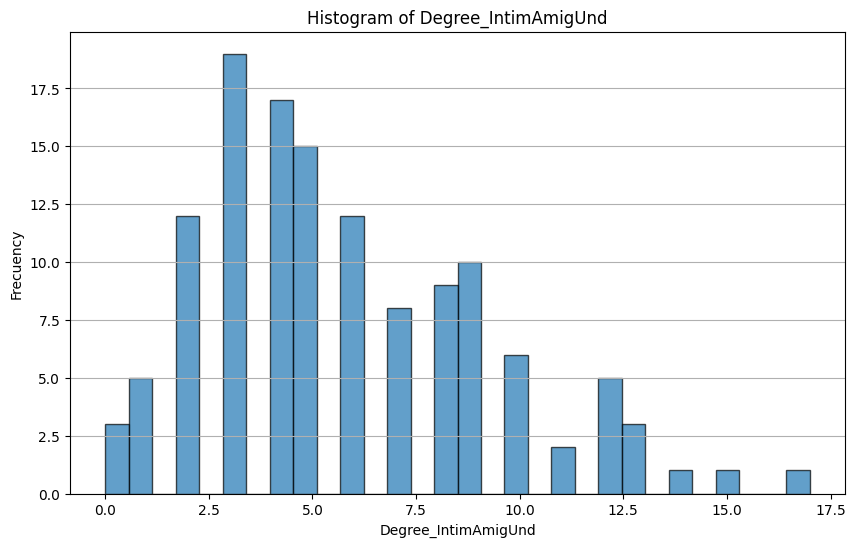

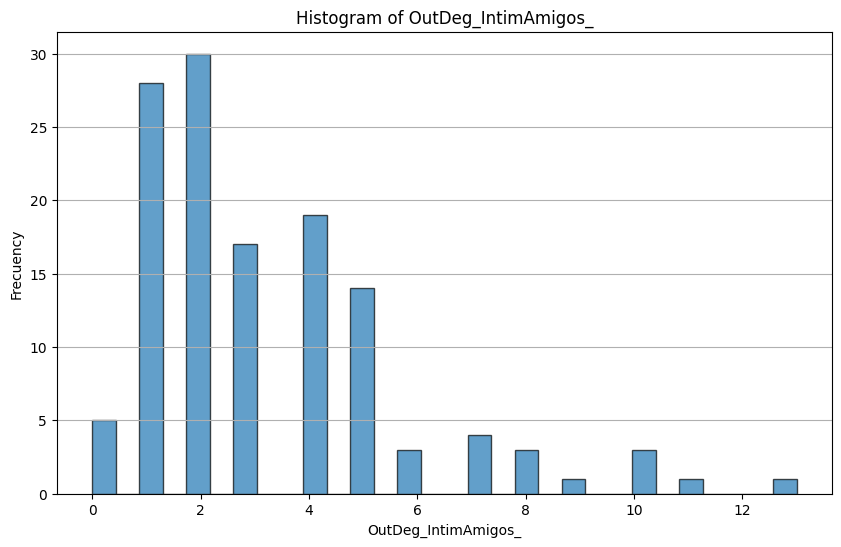

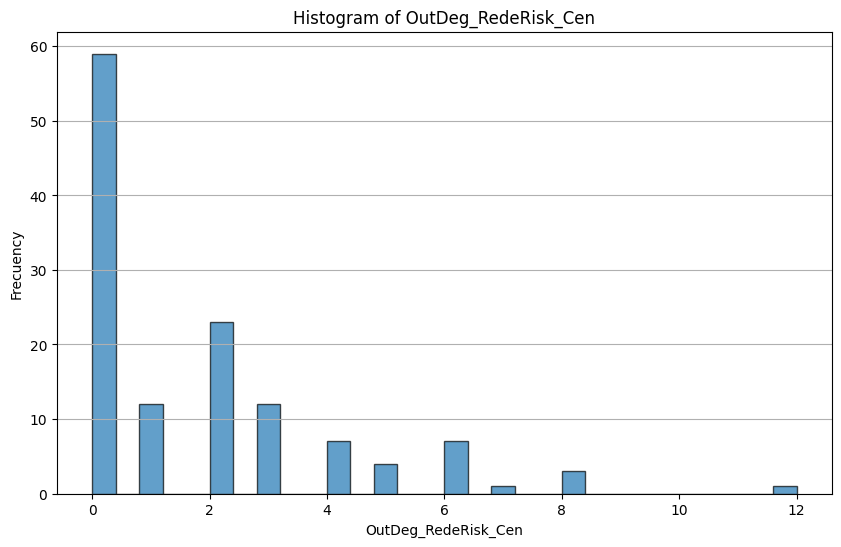

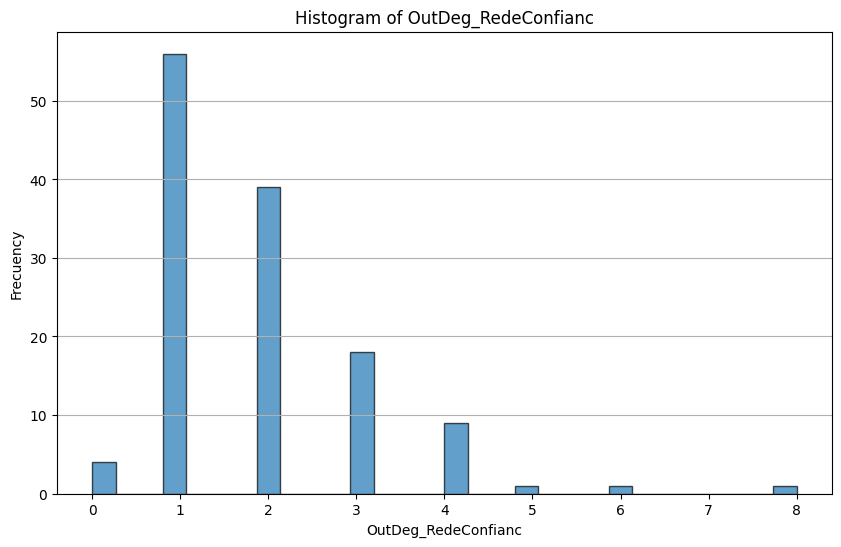

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Exclude the 'id' column
dep_vars_df_indep = data_frame_combinado_indep

# Select the number of variables you want to plot
num_plots = 10  # Choose how many plots you want here. Be careful if you select too many, it will plot all of them.

# Create histograms for each selected independent variable and save them
selected_columns = dep_vars_df_indep.columns[:num_plots]

for col in selected_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dep_vars_df_indep[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    # plt.savefig(f'../DataIntermediate/histogram_{col}.png') # If you want to save the plot, remove the first # from this line.
    plt.show()



## Correlation between the variables

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data frames
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep=',')
data_frame_combinado_dep = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep=',')



In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# List of columns to transform
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    data_frame_combinado_indep[col] = label_encoder.fit_transform(data_frame_combinado_indep[col])


In [ ]:
# Delete the 'id' column if present
data_frame_combinado_indep = data_frame_combinado_indep.drop(columns=['id'], errors='ignore')
data_frame_combinado_dep = data_frame_combinado_dep.drop(columns=['id'], errors='ignore')

# Calculate the correlation matrix between all variables.
combined_df = pd.concat([data_frame_combinado_dep, data_frame_combinado_indep], axis=1)


In [465]:
data_frame_combinado_indep

,OutDeg_RedConfltAgu,Degree_RedConfliAgu,Degree_RedeIrmonsPr,OutDeg_PaiTiopaterC,OutDeg_TiosMaternos,Degree_IntimAmigUnd,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,Degree_RedeConflitA,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,0,0,3,0,0,8,2,3,2,0,...,2,0,0,53,2,1.0,3,3,0,2.3644
1,0,0,0,0,0,4,4,0,1,0,...,1,0,0,37,2,1.0,1,0,0,0.5087
2,0,0,0,0,0,3,2,0,3,0,...,0,0,0,25,1,1.0,4,3,1,1.4640
3,0,0,0,0,2,6,4,1,2,0,...,0,1,0,48,2,2.0,4,3,0,1.5186
4,0,0,2,0,3,1,1,0,2,0,...,1,0,0,30,1,1.0,2,1,0,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3,3,0,0,0,9,4,8,1,0,...,2,1,0,52,2,2.0,4,16,1,4.7238
125,0,0,4,0,0,12,5,2,2,0,...,2,1,0,51,2,3.0,2,7,0,5.3823
126,0,0,0,0,1,3,2,2,1,0,...,2,1,0,78,3,2.0,1,1,0,2.9833
127,0,0,0,0,0,4,4,0,1,0,...,2,1,0,52,2,1.0,4,3,0,1.3262


In [466]:
print(data_frame_combinado_dep)

     Degree_Rede_EntreajudaLabur  OutDeg_Var.Dep_RedeControlExtAusencia  \
0                              7                                      0   
1                              2                                      2   
2                             10                                      1   
3                             10                                      2   
4                             19                                      0   
..                           ...                                    ...   
124                            9                                      3   
125                           12                                      1   
126                           15                                      0   
127                            9                                      1   
128                            9                                      4   

     OutDeg_Var.Dep_ApoioSpecDiqCint  OutDeg_Var.Dep_ApoioSpecTubos  \
0                           

In [467]:
combined_df.head()

,Degree_Rede_EntreajudaLabur,OutDeg_Var.Dep_RedeControlExtAusencia,OutDeg_Var.Dep_ApoioSpecDiqCint,OutDeg_Var.Dep_ApoioSpecTubos,OutDeg_Var.Dep_RedApoiLevntDiCin,OutDeg_RedCont_DiqPriqDiqCint,OutDeg_RedeRepar_DiqPriqDiqCint,OutDeg_Red-Val_Cont1Rep2DiqCin,OutDeg_Red-Val_Cont1Rep2DiqPrq,OutDeg_ContRep2_DiqPrqCin,...,2_VarExp_Atri_Tabanca,3_VarExp_Atri_Fanado,4_VarExp_Atri_CargosWM,5_VarExp_Atri_Idade,6_VarExp_Atri_ClassIdade,7_VarExp_Atri_IndForcaFugon,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha
0,7,0,1,0,2,2,2,0,4,4,...,2,0,0,53,2,1.0,3,3,0,2.3644
1,2,2,1,0,0,1,1,0,2,2,...,1,0,0,37,2,1.0,1,0,0,0.5087
2,10,1,1,0,0,0,0,0,0,0,...,0,0,0,25,1,1.0,4,3,1,1.4640
3,10,2,1,0,0,1,1,0,2,2,...,0,1,0,48,2,2.0,4,3,0,1.5186
4,19,0,0,0,0,0,0,0,0,0,...,1,0,0,30,1,1.0,2,1,0,0.2500


In [ ]:
corr_matrix = combined_df.corr()

# Extract only the correlations between dependent and independent variables.
corr_dep_indep = corr_matrix.loc[data_frame_combinado_dep.columns, data_frame_combinado_indep.columns]

output_path = "../Results/correlations_all.csv"
os.makedirs("../Results/", exist_ok=True)
corr_dep_indep.to_csv(output_path, index=True)

print(corr_dep_indep)

                                       OutDeg_RedConfltAgu  \
Degree_Rede_EntreajudaLabur                       0.023779   
OutDeg_Var.Dep_RedeControlExtAusencia             0.151002   
OutDeg_Var.Dep_ApoioSpecDiqCint                   0.179464   
OutDeg_Var.Dep_ApoioSpecTubos                     0.185572   
OutDeg_Var.Dep_RedApoiLevntDiCin                  0.143800   
OutDeg_RedCont_DiqPriqDiqCint                     0.223241   
OutDeg_RedeRepar_DiqPriqDiqCint                   0.208173   
OutDeg_Red-Val_Cont1Rep2DiqCin                    0.171678   
OutDeg_Red-Val_Cont1Rep2DiqPrq                    0.250880   
OutDeg_ContRep2_DiqPrqCin                         0.225402   
OutDeg_Var.Dep_RedePartilhaAgu                    0.405592   

                                       Degree_RedConfliAgu  \
Degree_Rede_EntreajudaLabur                       0.039260   
OutDeg_Var.Dep_RedeControlExtAusencia             0.155462   
OutDeg_Var.Dep_ApoioSpecDiqCint                   0.177466   
OutDeg_

In [ ]:
# Correlation threshold
threshold = 0.10

# Filter absolute correlations greater than the threshold and convert to a long-format DataFrame
high_corr = corr_dep_indep[corr_dep_indep.abs() > threshold].stack().reset_index()
high_corr.columns = ['Dependent Variable', 'Independent Variable', 'Correlation']

# Sort by the magnitude of the correlation
high_corr = high_corr.reindex(high_corr['Correlation'].abs().sort_values(ascending=False).index)

print("DataFrame with the highest correlations:")
high_corr.head(130)

DataFrame con las correlaciones más altas:


,Variable Dependiente,Variable Independiente,Correlación
67,OutDeg_Var.Dep_ApoioSpecTubos,10_VarExp_Atri_MelhorTecnTubos,0.981626
49,OutDeg_Var.Dep_ApoioSpecDiqCint,9_VarExp_Atri_IndMelhorTecnDiqCint,0.837353
196,OutDeg_ContRep2_DiqPrqCin,9_VarExp_Atri_IndMelhorTecnDiqCint,0.794611
109,OutDeg_RedCont_DiqPriqDiqCint,9_VarExp_Atri_IndMelhorTecnDiqCint,0.782172
131,OutDeg_RedeRepar_DiqPriqDiqCint,9_VarExp_Atri_IndMelhorTecnDiqCint,0.778076
...,...,...,...
121,OutDeg_RedeRepar_DiqPriqDiqCint,OutDeg_EmprestParce,0.204256
190,OutDeg_ContRep2_DiqPrqCin,1_VarExp_Moranca,-0.201713
125,OutDeg_RedeRepar_DiqPriqDiqCint,1_VarExp_Moranca,-0.200589
103,OutDeg_RedCont_DiqPriqDiqCint,1_VarExp_Moranca,-0.195964


Archivo guardado exitosamente en ../Results/correlations_10.csv.


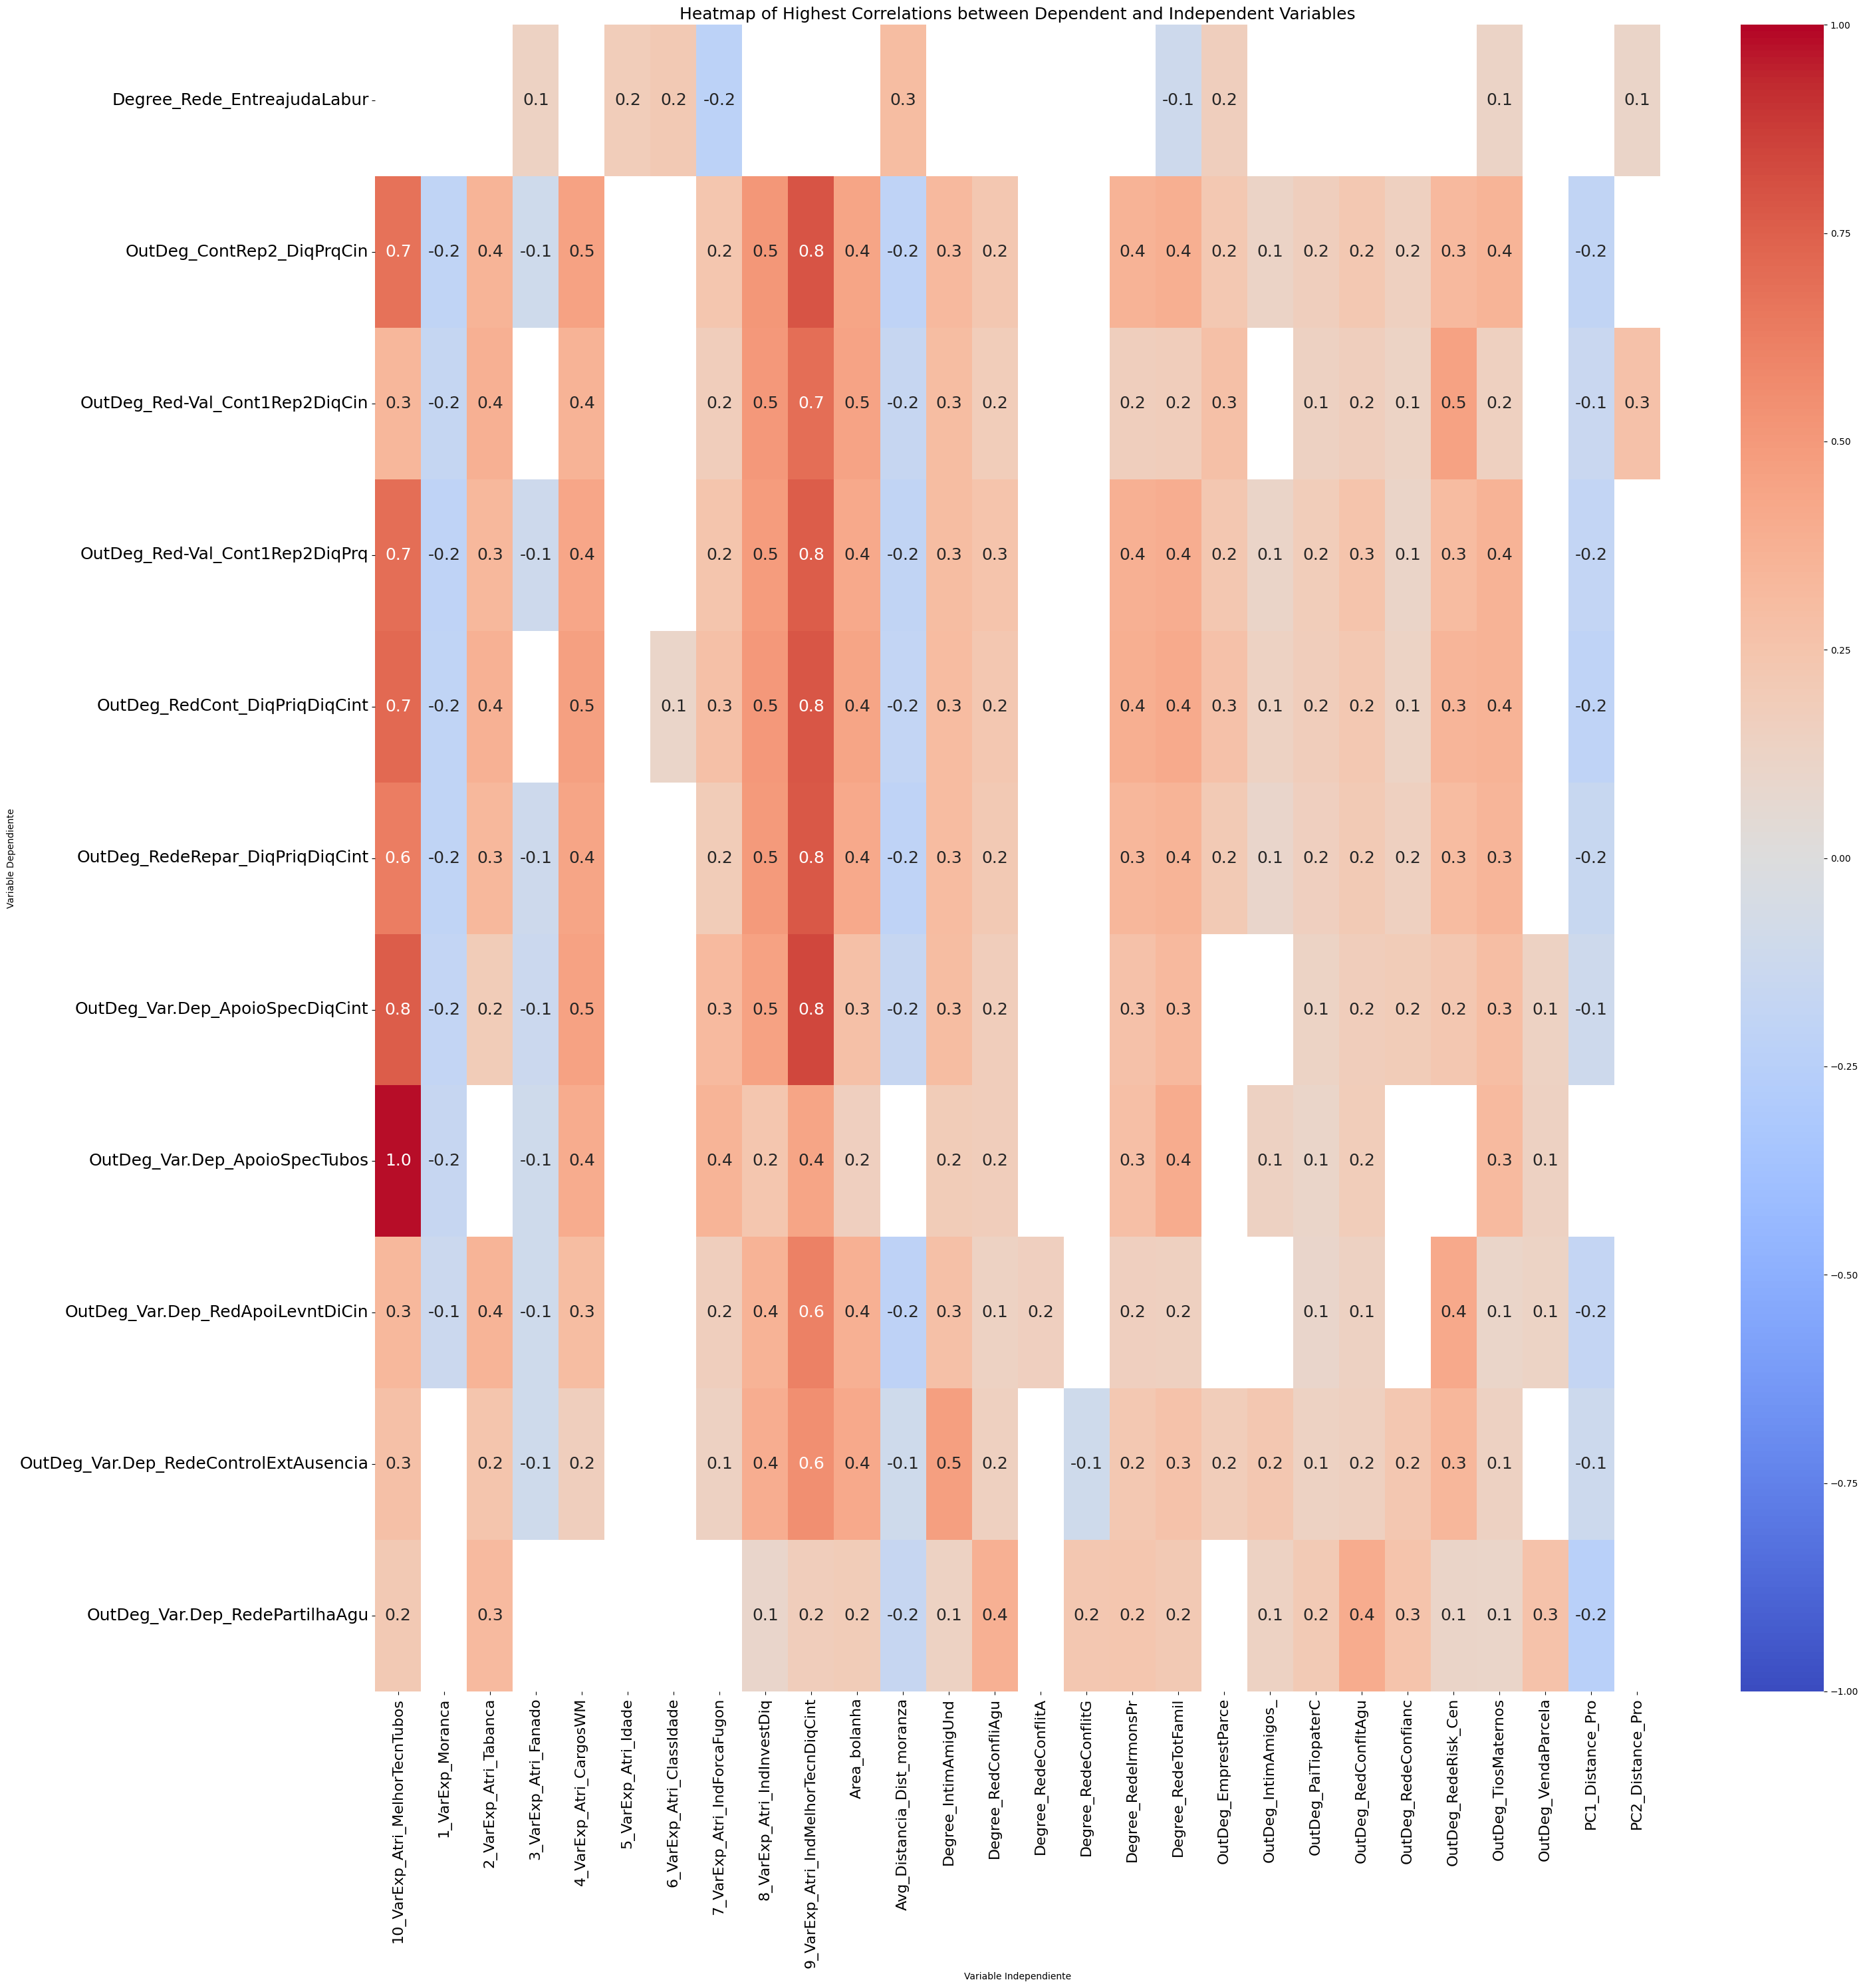

In [470]:
# Crear un DataFrame pivotado de high_corr
high_corr_pivot = high_corr.pivot_table(index='Variable Dependiente', columns='Variable Independiente', values='Correlación')

# Guardar el DataFrame pivotado en un archivo CSV
output_path = "../Results/correlations_10.csv"
os.makedirs("../Results/", exist_ok=True)
try:
    high_corr_pivot.to_csv(output_path, index=True)
    print(f"Archivo guardado exitosamente en {output_path}.")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")

# Ajustar el tamaño de la figura y el tamaño de la fuente
plt.figure(figsize=(30, 30))  # Aumentar el tamaño de la figura
sns.heatmap(high_corr_pivot, annot=True, fmt='.1f', cmap='coolwarm', center=0, vmin=-1, vmax=1, annot_kws={"size": 18})
plt.title('Heatmap of Highest Correlations between Dependent and Independent Variables', fontsize=18)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=18)
plt.tight_layout()  # Ajustar el layout para que no se recorten las etiquetas
plt.show()